In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#läser in parquet-filen
wine=pd.read_parquet('wine_parquet')

In [8]:
wine['country']=wine['country'].astype('category')
wine['description']=wine['description'].astype('string')
wine['variety']=wine['variety'].astype('category')
wine['winery']=wine['winery'].astype('category')
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89125 entries, 0 to 149639
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      89125 non-null  category
 1   description  89125 non-null  string  
 2   points       89125 non-null  int64   
 3   price        89125 non-null  float64 
 4   variety      89125 non-null  category
 5   winery       89125 non-null  category
dtypes: category(3), float64(1), int64(1), string(1)
memory usage: 3.8 MB


In [3]:
#tar bort de kolumner som vi inte är intresserade av i den här analysen
wine=wine.drop(columns=['region_1', 'region_2', 'designation','province'])
#tar bort de rader som saknar land
wine=wine.dropna(subset=['country'])
#tar bort dubeltter
wine=wine.drop_duplicates(keep='first')

In [4]:
#Data cleaning. Kolumnen Price och de med NaN värden plockas bort för prisjämförelserna.
wine=wine.dropna(subset=['price'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89125 entries, 0 to 149639
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      89125 non-null  object 
 1   description  89125 non-null  object 
 2   points       89125 non-null  int64  
 3   price        89125 non-null  float64
 4   variety      89125 non-null  object 
 5   winery       89125 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ MB


/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47452/3725724497.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_100_most_expensive_corr=top_100_most_expensive.groupby('variety')[['points', 'price']].corr()


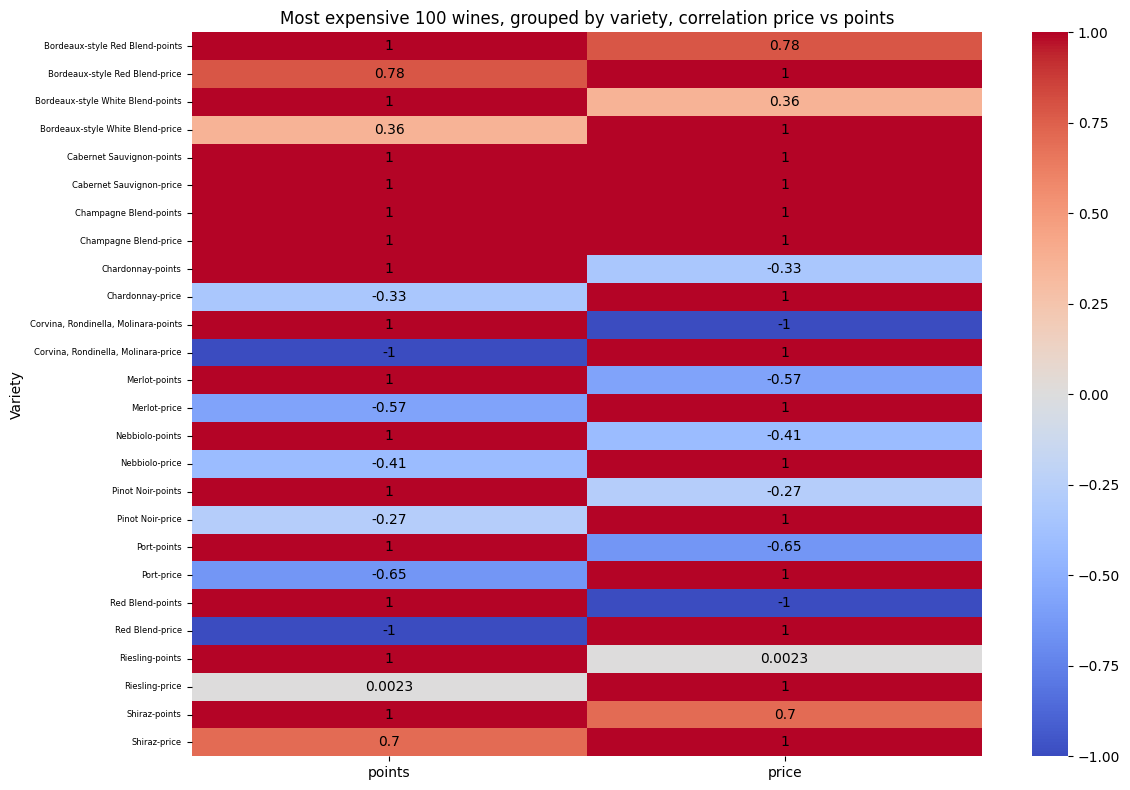

In [10]:
#Diagram 1
#korrelation mellan pris och poäng för de 100 dyraste vinerna, grupperat/vinsort.
most_expensive= wine.sort_values(by='price', ascending=False)
top_100_most_expensive=most_expensive.iloc[:100]

#pd.set_option('display.max_rows', 20)
top_100_most_expensive_corr=top_100_most_expensive.groupby('variety')[['points', 'price']].corr()
top_100_most_expensive_corr=top_100_most_expensive_corr.dropna()
plt.figure(figsize=(12,8))
sns.heatmap(top_100_most_expensive_corr, annot=True, cmap='coolwarm', annot_kws={'size':10, 'color':'black'})
plt.yticks(size=6)
plt.ylabel('Variety')
plt.title('Most expensive 100 wines, grouped by variety, correlation price vs points')
plt.tight_layout()
#plt.savefig("Most expensive 500 wines, variety, correlation.png", bbox_inches=None)

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47452/1670659149.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_100_cheapest_variety_corr=top_100_cheapest.groupby('variety')[['points', 'price']].corr()


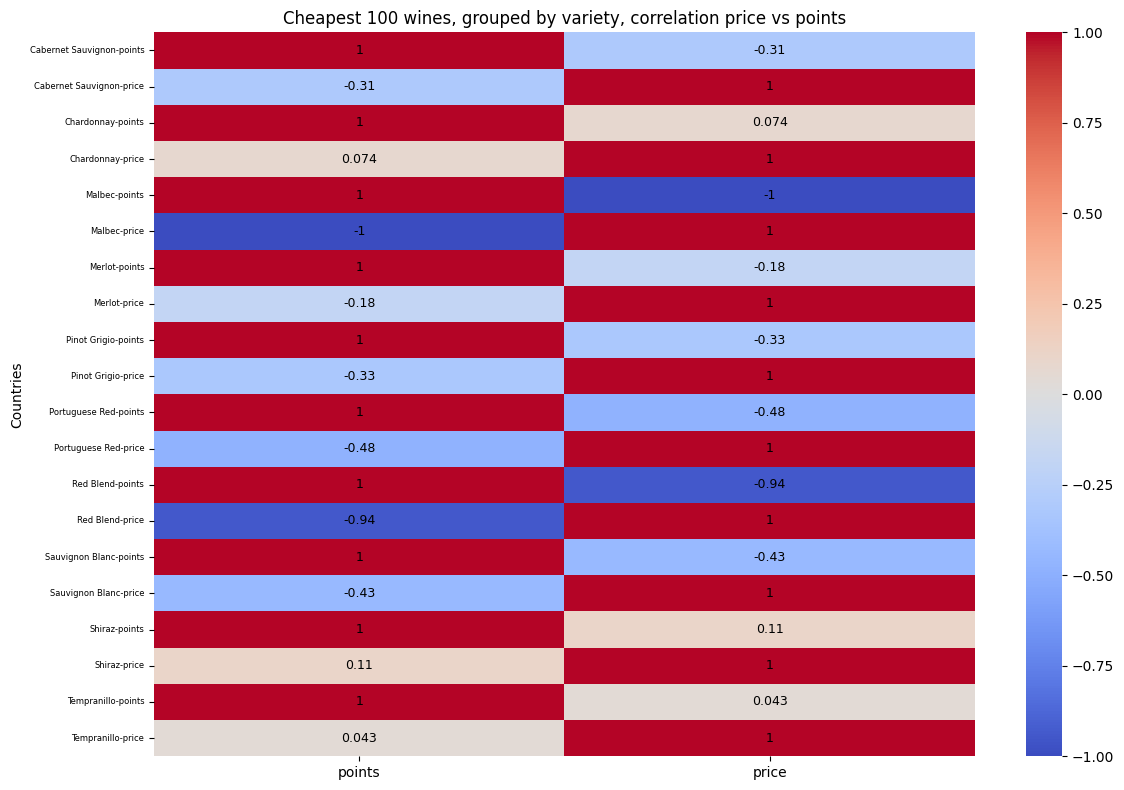

In [11]:
#Diagram 2
#vilka viner är billigast och finns det någon korrelation till poäng, grupperat på variety?
cheapest= wine.sort_values(by='price', ascending=True)
top_100_cheapest=cheapest.iloc[:100]
top_100_cheapest_variety_corr=top_100_cheapest.groupby('variety')[['points', 'price']].corr()
top_100_cheapest_variety_corr=top_100_cheapest_variety_corr.dropna()
plt.figure(figsize=(12,8))
sns.heatmap(top_100_cheapest_variety_corr, annot=True, cmap='coolwarm', annot_kws={'size':9, 'color':'black'})
plt.title('Correlation between Points and Price for 100 cheapest Wines')
plt.yticks(size=6)
plt.ylabel('Countries')
plt.title('Cheapest 100 wines, grouped by variety, correlation price vs points')
plt.tight_layout()

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47452/3450115753.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wines_with_100_points_grouped=wines_with_100_points.groupby('variety')['points'].mean()
/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47452/3450115753.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_wines_corr=top_wines_variety.groupby('variety')[['points','price']].corr()


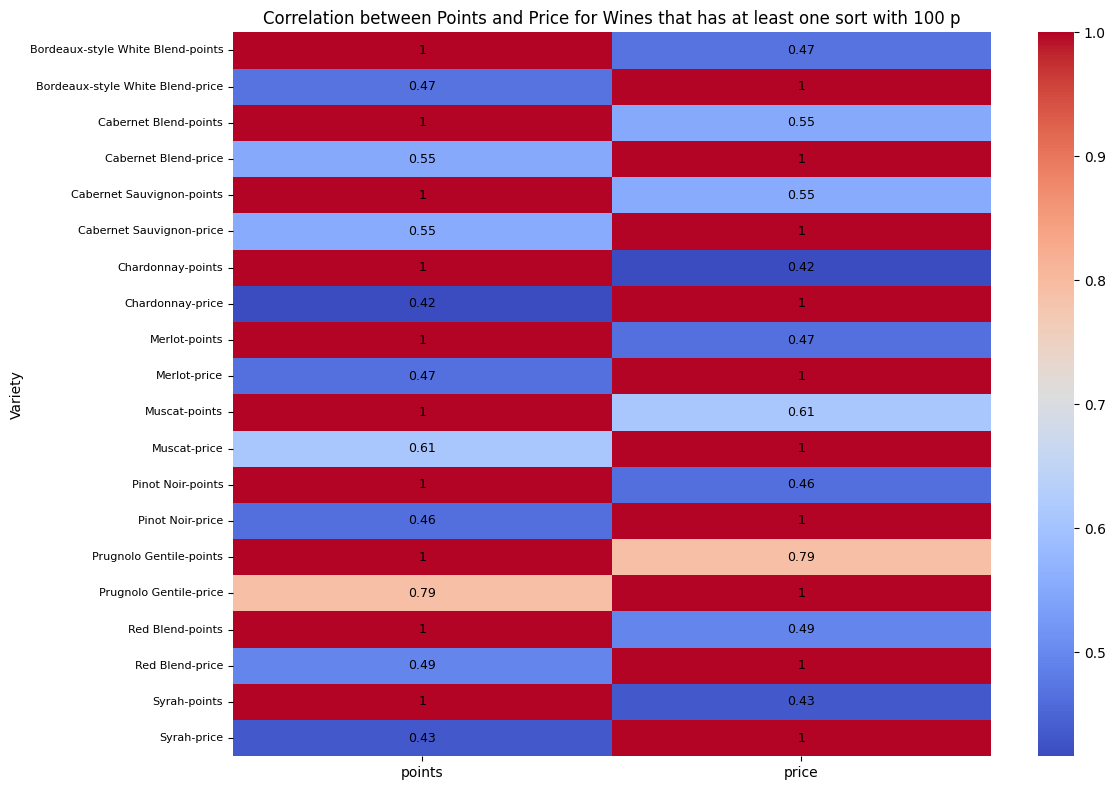

In [13]:
#Diagram 3
#korrelation mellan pris och poäng för de viner som förekommer med 100 poäng.
wines_with_100_points=wine[wine['points']==100]
wines_with_100_points_grouped=wines_with_100_points.groupby('variety')['points'].mean()
wines_with_100_points_grouped
top_wines_with_100_p=['Bordeaux-style White Blend','Cabernet Blend' ,'Cabernet Sauvignon', 'Chardonnay','Merlot','Muscat','Pinot Noir','Prugnolo Gentile','Red Blend','Syrah' ]
top_wines_variety=wine[wine['variety'].isin(top_wines_with_100_p)]
top_wines_corr=top_wines_variety.groupby('variety')[['points','price']].corr()
top_wines_corr=top_wines_corr.dropna()
plt.figure(figsize=(12,8))
sns.heatmap(top_wines_corr, annot=True, cmap='coolwarm', annot_kws={'size':9, 'color':'black'})
plt.title('Correlation between Points and Price for Wines that has at least one sort with 100 p')
plt.yticks(size=8)
plt.ylabel('Variety')
plt.tight_layout()